In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read atlases

In [2]:
#HPA atlases
tpm_rnaAtlas = pd.read_csv('tpm_rnaAtlas.csv')
ntpm_rnaAtlas = pd.read_csv('ntpm_rnaAtlas.csv')
ptpm_rnaAtlas = pd.read_csv('ptpm_rnaAtlas.csv')
abAtlas = pd.read_csv('antibody_atlas.csv')
#ProteomicsDB
db = pd.read_csv('proteomicsdb.csv')


In [3]:
db = db.rename(columns={'UniProt': 'Uniprot_id'})
abAtlas = abAtlas.rename(columns={'uniprot_id': 'Uniprot_id'})

## Comparison on organ level

In [4]:
comp = pd.DataFrame(columns=['comparison', 'level','kendall (mean)', 'kendall (stdev)' ])


hpa_atlases = [abAtlas, tpm_rnaAtlas, ntpm_rnaAtlas, ptpm_rnaAtlas]
hpa_names = ['abAtlas', 'tpm_rnaAtlas', 'ntpm_rnaAtlas', 'ptpm_rnaAtlas']
hpa_values = ['Level','TPM','nTPM','pTPM']

protein_expression_atlases = [db]
protein_expression_names = ['ProteomicsDB']
i = 0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['normalised intensity'].notna()]
        
        #first comparison on organ level
        organ = df['Organ_id'].unique()
        row.append('Organ')
        organsDict = {elem : pd.DataFrame for elem in organ}
        for key in organsDict.keys():
            organsDict[key] = df[:][df['Organ_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the normalised intensity and expression level value
        ps_list = []
        kendall_list = []

        for key in organsDict.keys():
            kendall = organsDict[key]['normalised intensity'].corr(organsDict[key][hpa_value], method = 'kendall')
            kendall_list.append(kendall)
        list_of_corrs = [kendall_list]
        names = ['kendall']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp.loc[len(comp)] = row


comparison of abAtlas and ProteomicsDB
comparison of tpm_rnaAtlas and ProteomicsDB
comparison of ntpm_rnaAtlas and ProteomicsDB
comparison of ptpm_rnaAtlas and ProteomicsDB


In [5]:
comp

,comparison,level,kendall (mean),kendall (stdev)
0,abAtlas - ProteomicsDB,Organ,"[0.027611700876335743, 0.052086253707029434, 0...",0.057434
1,tpm_rnaAtlas - ProteomicsDB,Organ,"[0.27298385694748606, 0.2500733737844302, 0.31...",0.051094
2,ntpm_rnaAtlas - ProteomicsDB,Organ,"[0.2731757582189392, 0.25103925436320373, 0.31...",0.044643
3,ptpm_rnaAtlas - ProteomicsDB,Organ,"[0.27258482281235574, 0.24911698419001607, 0.3...",0.051231


[Text(0, 0, 'abAtlas - ProteomicsDB'),
 Text(0, 0, 'tpm_rnaAtlas - ProteomicsDB'),
 Text(0, 0, 'ntpm_rnaAtlas - ProteomicsDB'),
 Text(0, 0, 'ptpm_rnaAtlas - ProteomicsDB')]

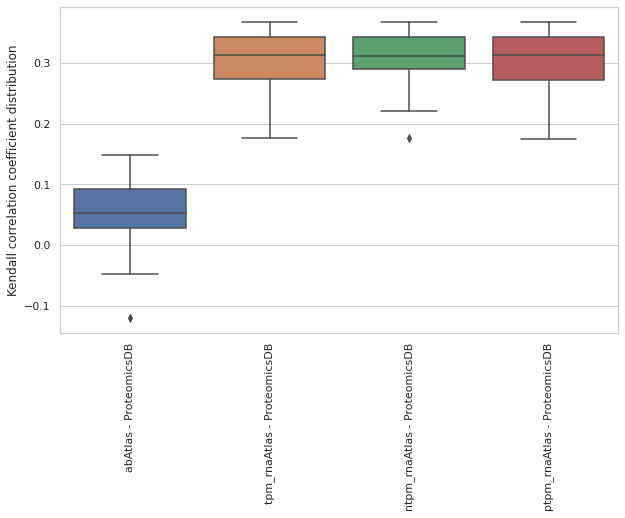

In [6]:
all_arrays = comp['kendall (mean)'].to_list()
comparisons = comp['comparison'].to_list()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(ax=ax, data=all_arrays)
ax.set(ylabel='Kendall correlation coefficient distribution')
ax.set_xticklabels(comparisons, rotation=90)
#ax.set_title("Kendall correlation coefficient distribution over organs comparing HPA and MS protein expression")

## Comparison on protein level

In [7]:
comp2 = pd.DataFrame(columns=['comparison', 'level', 'kendall (mean)', 'kendall (stdev)' ])



hpa_atlases = [abAtlas, tpm_rnaAtlas, ntpm_rnaAtlas, ptpm_rnaAtlas]
hpa_names = ['abAtlas', 'tpm_rnaAtlas', 'ntpm_rnaAtlas', 'ptpm_rnaAtlas']
hpa_values = ['Level','TPM','nTPM','pTPM']

protein_expression_atlases = [db]
protein_expression_names = ['ProteomicsDB']
i=0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        i += 1
        plt.figure(i)
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['normalised intensity'].notna()]
        #second comparison on protein level
        proteins = df['Uniprot_id'].unique()
        row.append('Protein')
        proteinsDict = {elem : pd.DataFrame for elem in proteins}
        for key in proteinsDict.keys():
            proteinsDict[key] = df[:][df['Uniprot_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the normalised intensity and expression level value
        ps_list = []
        kendall_list = []

        for key in proteinsDict.keys():
            kendall = proteinsDict[key]['normalised intensity'].corr(proteinsDict[key][hpa_value], method = 'kendall')
            kendall_list.append(kendall)
        list_of_corrs = [kendall_list]
        names = ['kendall']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp2.loc[len(comp2)] = row

comparison of abAtlas and PDB
comparison of tpm_rnaAtlas and PDB
comparison of ntpm_rnaAtlas and PDB
comparison of ptpm_rnaAtlas and PDB


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Text(0, 0, 'abAtlas - ProteomicsDB'),
 Text(0, 0, 'tpm_rnaAtlas - ProteomicsDB'),
 Text(0, 0, 'ntpm_rnaAtlas - ProteomicsDB'),
 Text(0, 0, 'ptpm_rnaAtlas - ProteomicsDB')]

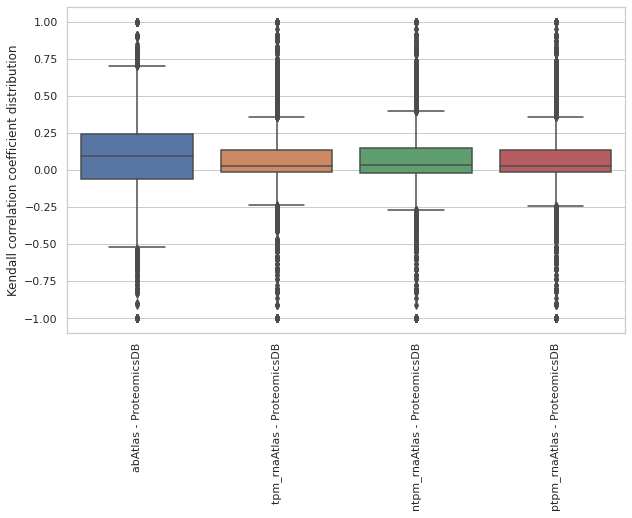

In [36]:
all_arrays = comp2['kendall (mean)'].to_list()
comparisons = comp2['comparison'].to_list()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(ax=ax, data=all_arrays)
ax.set(ylabel='Kendall correlation coefficient distribution')
ax.set_xticklabels(comparisons, rotation=90)
#ax.set_title("Kendall correlation coefficient distribution over proteins comparing HPA and MS protein expression")